# Titanic 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
train_df = pd.read_csv('train.csv')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId : 승객 아이디
- Survived : 생존 여부 (0 = 사망, 1 = 생존) -> 타켓변수
- Pclass : 티켓 등급 (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name : 이름
- Sex : 성별
- Age : 나이
- SibSp(Sibling + Spouse) : 형제, 자매, 배우자 수
- Parch(Parent + Child) : 부모, 자녀 수
- Ticket : 티켓번호
- Fare : 운임
- Cabin : 좌석번호
- Embarked : 승선항(C = Cherbourg, Q = Queenstown, S = Southampton)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 총 890개의 데이터가 있고 12개의 컬럼이 존재한다.

### 결측치 확인

In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 결측치 개수
- Age : 177
- Cabin : 687
- Embarked : 2

In [13]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 결측치 채우기
- 수치상으로 결측치를 채워줄 수 있는 변수는 Age뿐이다. 평균으로 결측치를 채워주자

In [15]:
train_df.Age.fillna(train_df.Age.mean(), inplace=True)

In [16]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
train_df.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [21]:
train_df.Embarked.fillna('S', inplace=True)

In [22]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [53]:
train_df.Cabin.value_counts(dropna=False)

NaN            687
G6               4
B96 B98          4
C23 C25 C27      4
C22 C26          3
              ... 
E58              1
F38              1
E49              1
B30              1
A20              1
Name: Cabin, Length: 148, dtype: int64

## Visualizing

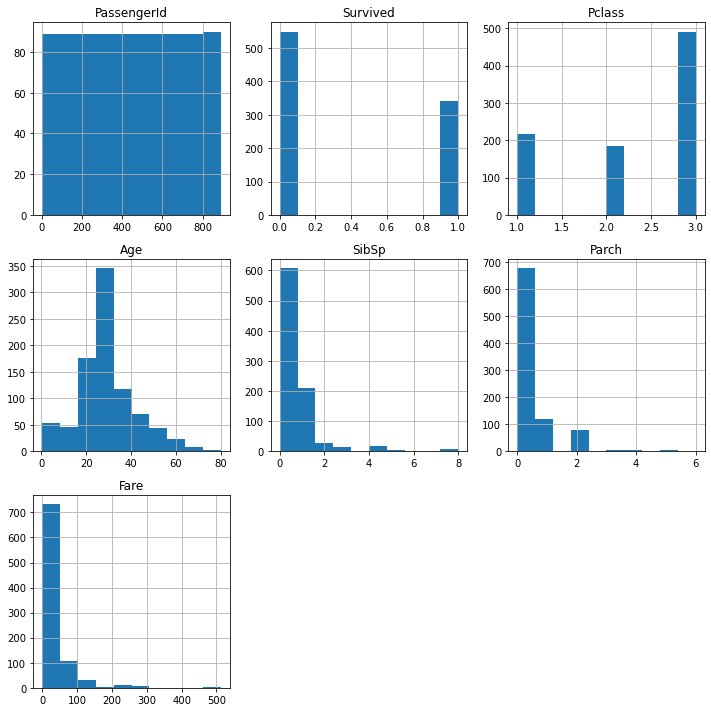

In [32]:
train_df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

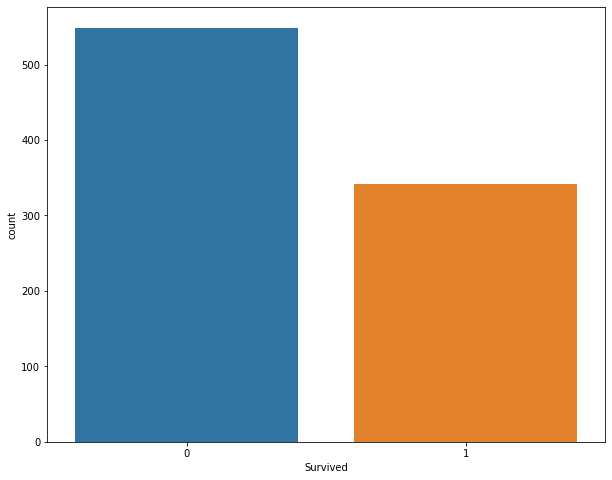

In [12]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Survived', data=train_df)

In [46]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

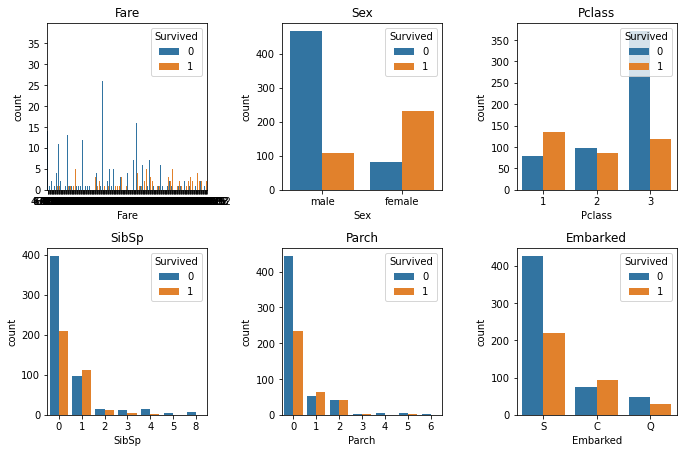

In [55]:
cols = ['Fare', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c    
        ax = axs[r][c] 
        sns.countplot(train_df[cols[i]], hue=train_df["Survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="Survived", loc='upper right') 
        
plt.tight_layout()

## Preprocessing
- PassengerId, Name, Ticket, Fare, Cabin 데이터를 지워준다.
- Name에 들어있는 호칭은 Female에서 구분이 가능하므로 삭제한다.
- Ticket, Fare 는 생존과 관련된 점을 찾을 수 없었다.
- Cabin은 결측치가 너무 많아 결측치를 채워줘도 이상치로 판단할 수 있다.

In [57]:
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis = 1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


- Sex와 Embarker가 문자이므로 수치형으로 바꿔준다.
- sklearn의 LabelEncode를 사용해 문자를 수치로 매핑 시켜준다.

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])

In [61]:
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


- 모든 문자가 수치형으로 바뀌었다.

## Make Train Dataset

In [63]:
x_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']

In [67]:
print('Train Data Shape(X, Y) : ', x_train.shape, y_train.shape)

Train Data Shape(X, Y) :  (891, 6) (891,)


## Prepare Test Dataset

In [68]:
test_df = pd.read_csv('test.csv')

In [69]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [70]:
test_df.Age.fillna(test_df.Age.mean(), inplace=True)

In [71]:
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis = 1, inplace=True)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [72]:
test_df.Sex = le.fit_transform(test_df['Sex'])
test_df.Embarked = le.fit_transform(test_df['Embarked'])
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,1
1,3,0,47.0,1,0,2
2,2,1,62.0,0,0,1
3,3,1,27.0,0,0,2
4,3,0,22.0,1,1,2


In [73]:
x_test = test_df

## Data Scailing
- 데이터에 이상치가 크게 없다면 Standard Scaler가 가장 큰 효율을 갖는다. 음수값을 갖는 데이터도 없기 때문에 MinMax Scaler를 사용할 필요는 없다.

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
sc = StandardScaler()

In [76]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Machine Learning Alogorithm

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [78]:
# 의사결정 트리
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# 랜덤 포레스트
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [158]:
model = Sequential()

In [159]:
model.add(Dense(128, activation='relu', input_dim=6))
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [160]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_36 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_37 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_38 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 17        
Total params: 11,777
Trainable params: 11,777
Non-trainable params: 0
_________________________________________________________________


In [161]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [162]:
history = model.fit(x_train, y_train, epochs=500, verbose=1)

Epoch 1/500
28/28 [==============================] - 0s 963us/step - loss: 0.6658 - accuracy: 0.6475
Epoch 2/500
28/28 [==============================] - 0s 963us/step - loss: 0.4938 - accuracy: 0.8181
Epoch 3/500
28/28 [==============================] - 0s 963us/step - loss: 0.4115 - accuracy: 0.8299
Epoch 4/500
28/28 [==============================] - 0s 889us/step - loss: 0.4054 - accuracy: 0.8316
Epoch 5/500
28/28 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8332
Epoch 6/500
28/28 [==============================] - 0s 926us/step - loss: 0.4209 - accuracy: 0.8138
Epoch 7/500
28/28 [==============================] - 0s 889us/step - loss: 0.4095 - accuracy: 0.8199
Epoch 8/500
28/28 [==============================] - 0s 926us/step - loss: 0.3962 - accuracy: 0.8358
Epoch 9/500
28/28 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8405
Epoch 10/500
28/28 [==============================] - 0s 889us/step - loss: 0.3810 - accuracy: 

In [87]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [88]:
forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [163]:
TreeScore = tree.score(x_train, y_train)
ForestScore = forest.score(x_train, y_train)
score = model.evaluate(x_train, y_train)

28/28 [==============================] - 0s 667us/step - loss: 0.2134 - accuracy: 0.9068


In [164]:
print('Decision Tree Accuracy : %.2f%%\n' % (TreeScore*100))
print('Random Forest Accuracy : %.2f%%\n' % (ForestScore*100))
print('Perceptron Accuracy    : %.2f%%\n' % (score[1]*100))

Decision Tree Accuracy : 93.71%

Random Forest Accuracy : 92.37%

Perceptron Accuracy    : 90.68%



- Perceptron은 처음에 히든 레이어 2개의 유닛 32개로 했을때의 정확도는 83%
- 히든 레이어를 4개 사용하고 유닛을 128개로 했을때의 정확도는 92%까지 올랐다.